<a href="https://colab.research.google.com/github/rockfiller/Prediction-of-quality-of-Wine/blob/main/Prediction_of_quality_of_Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


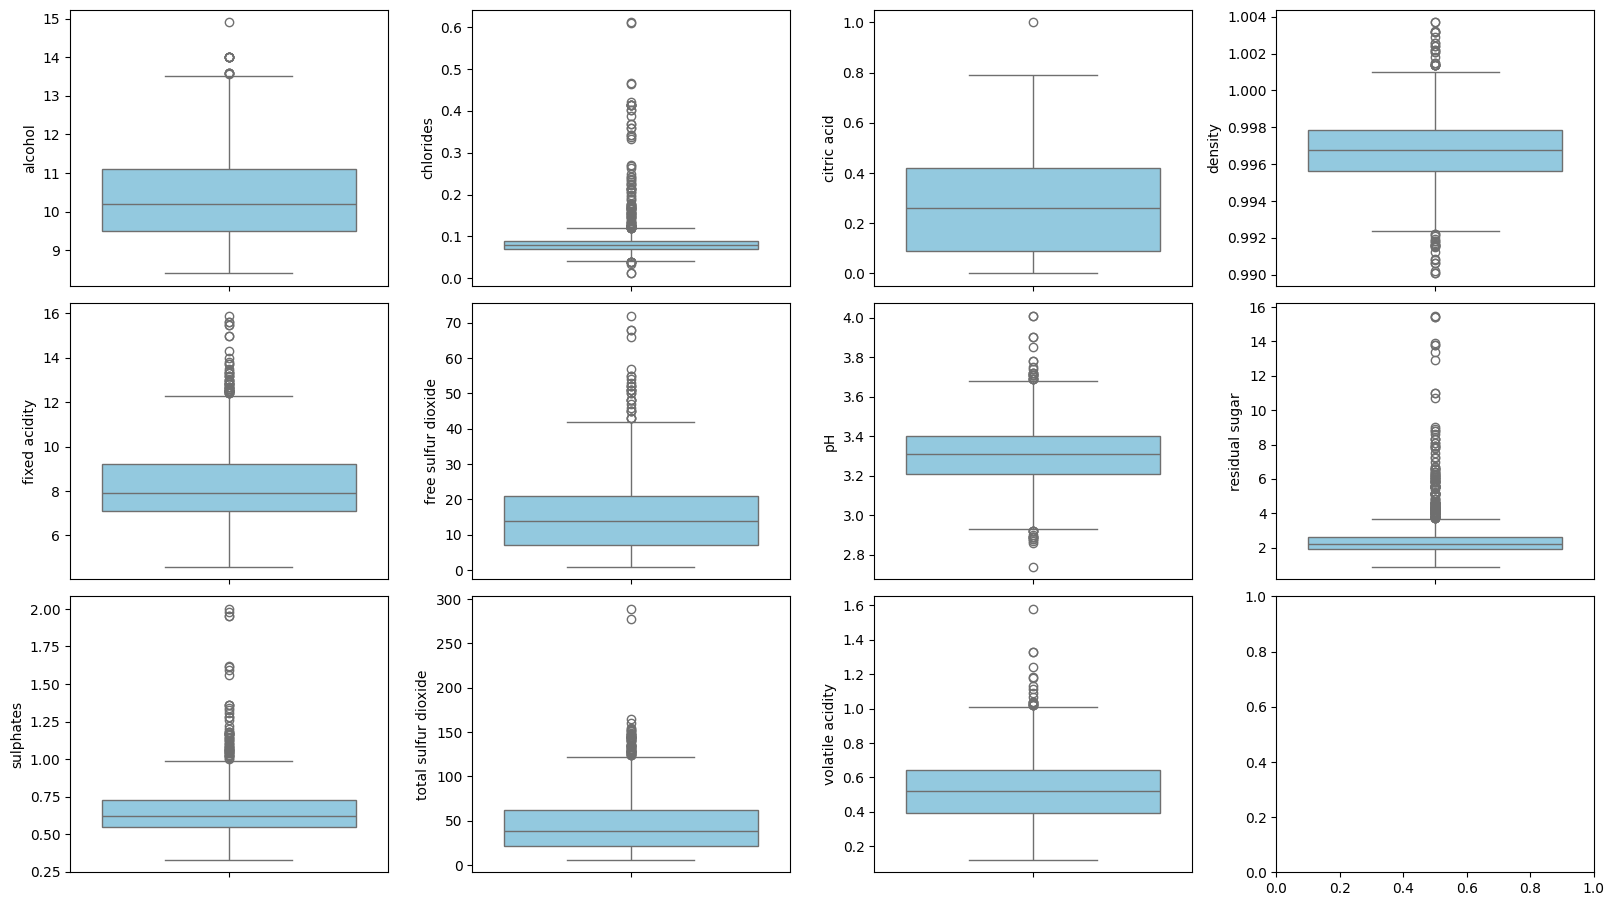

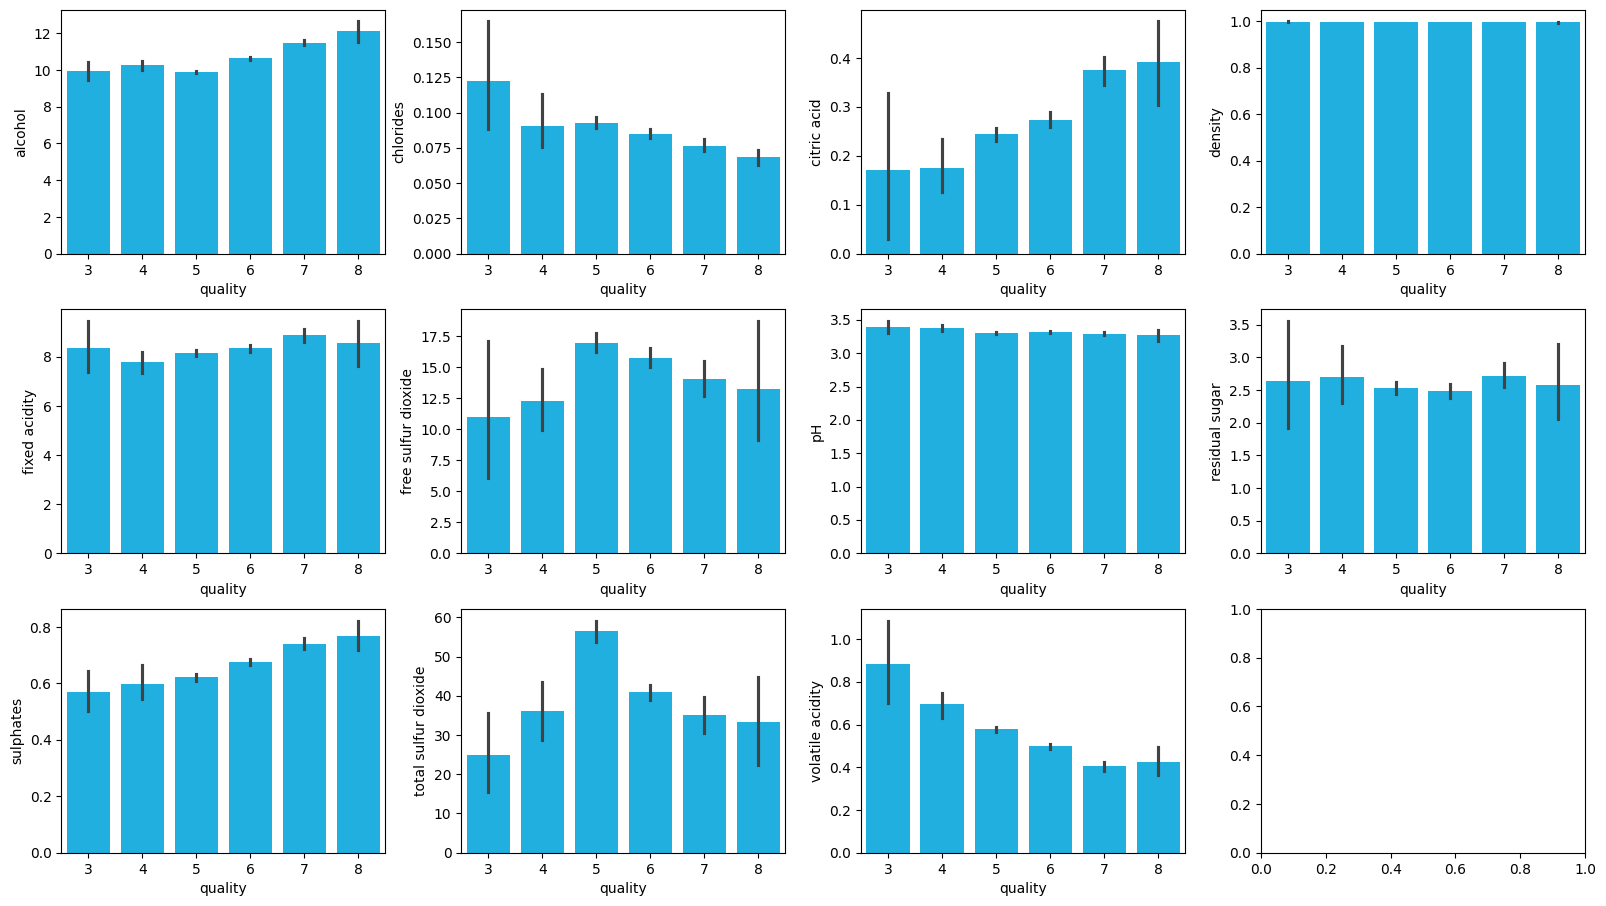

In [ ]:
def plot_subplots(data, plot_type, nrows, ncols, figsize, exclude_col):
    '''
    Plot multiple charts (boxplots or barplots) for a given dataset.

    Parameters:
        data: DataFrame to plot
        plot_type: Type of chart ('boxplot' or 'barplot')
        nrows: Number of rows of subplots
        ncols: Number of columns of subplots
        figsize: Figure size (tuple)
        exclude_col: Column to exclude from plotting
    '''
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(data.columns.difference(exclude_col)):
        if plot_type == 'boxplot':
            sns.boxplot(data=data, y=data[col], ax=axes[i], color='skyblue')
        elif plot_type == 'barplot':
            sns.barplot(data=data, x='quality', y=data[col], ax=axes[i], color='deepskyblue')
        else:
            raise ValueError('Invalid plot type')
    plt.tight_layout(pad=0.5)
    plt.show()

plot_subplots(data=df, plot_type='boxplot', nrows=3, ncols=4, figsize=(16, 9), exclude_col=['quality'])
plot_subplots(data=df, plot_type='barplot', nrows=3, ncols=4, figsize=(16, 9), exclude_col=['quality'])

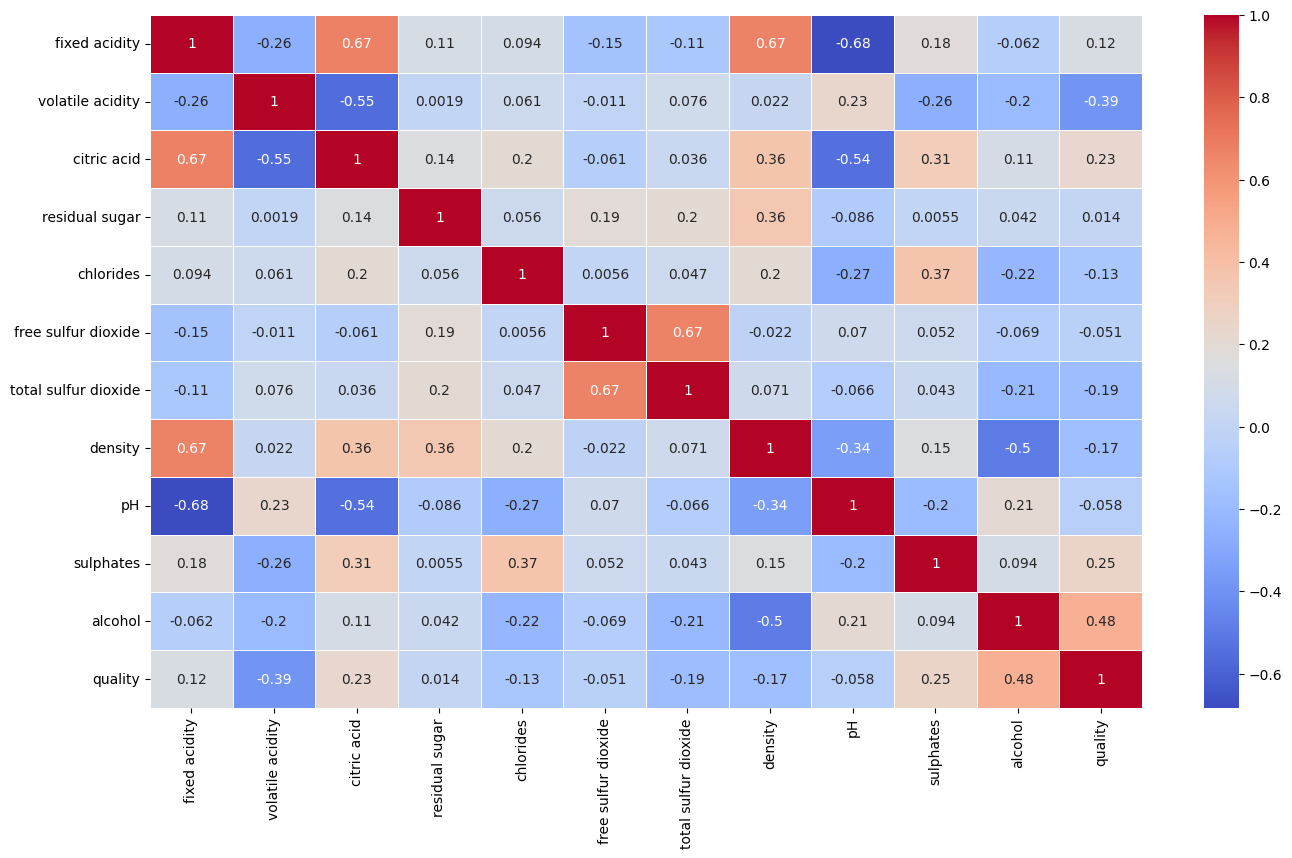

In [ ]:
plt.figure(figsize=(16, 9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidth=.5)
plt.show()

In [ ]:
# https://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf
df['molecular sulfur dioxide'] = df['free sulfur dioxide'] / (1 + 10 ** (df['pH'] - 1.8))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.210381
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.957163
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.502676
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.711039
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.210381


<Axes: xlabel='quality'>

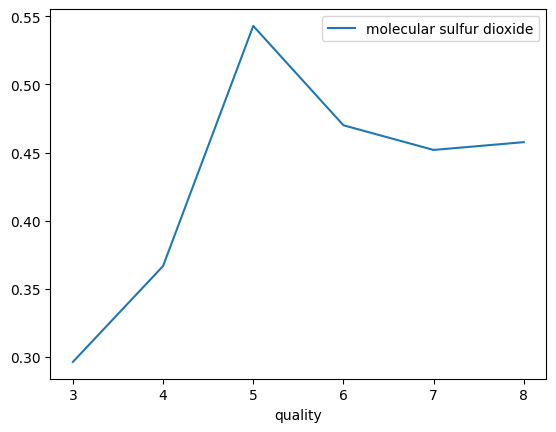

In [ ]:
df.groupby('quality').aggregate({'molecular sulfur dioxide': 'mean'}).plot.line()

In [ ]:
# StandardScaler
scaled_col = df.columns.difference(['quality'])
standard_scaler = StandardScaler()
df[scaled_col] = standard_scaler.fit_transform(df[scaled_col])
df.head()

# MinMaxScaler
# minmax_scaler = MinMaxScaler()
# df[scaled_col] = minmax_scaler.fit_transform(df[scaled_col])
# df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.742564
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,5,1.211462
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,5,0.022253
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,6,0.567456
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,5,-0.742564


In [ ]:
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data
bins = [0, 6.5, 10]
labels = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,bad,-0.742564
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,bad,1.211462
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,bad,0.022253
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,bad,0.567456
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,bad,-0.742564
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,bad,-0.642477
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,bad,-0.089931
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,good,-0.309474
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,good,-0.661828
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,bad,-0.073734


In [ ]:
label_encoder = LabelEncoder()
df['quality'] = label_encoder.fit_transform(df['quality'])
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,molecular sulfur dioxide
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,-0.742564
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,1.211462
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0.022253
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0,0.567456
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,-0.742564
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246,0,-0.642477
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246,0,-0.089931
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043,1,-0.309474
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379,1,-0.661828
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294,0,-0.073734


<Axes: xlabel='quality'>

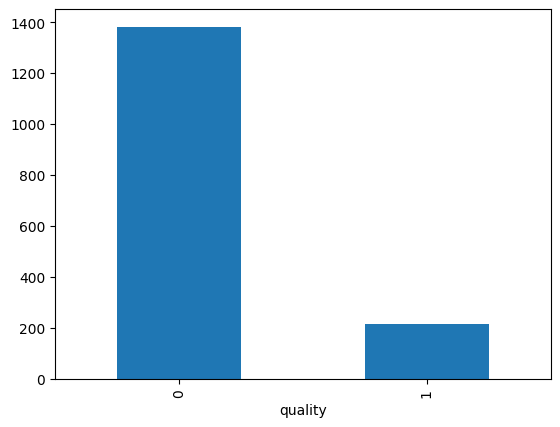

In [ ]:
df['quality'].value_counts().plot.bar()

In [ ]:
# data imbalance

# upsampling, downsampling, ...

In [ ]:
X = df.drop('quality', axis='columns')
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train: {X_train.shape}', f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}', f'y_test: {y_test.shape}')

X_train: (1279, 12) X_test: (320, 12)
y_train: (1279,) y_test: (320,)


In [ ]:
rfc = RandomForestClassifier(n_estimators=20, random_state=42)
scores = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=5)
print(f'accuracy average: {scores.mean()}', f'scores: {scores}')

accuracy average: 0.9085232843137255 scores: [0.890625   0.921875   0.8984375  0.921875   0.90980392]


In [ ]:
def model_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

for model_name, model in models.items():
    print(f'[ {model_name} ]')
    model_train_test(model, X_train, y_train, X_test, y_test)


[ Decision Tree ]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.61      0.60      0.60        47

    accuracy                           0.88       320
   macro avg       0.77      0.76      0.77       320
weighted avg       0.88      0.88      0.88       320

[ Random Forest ]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.51      0.59        47

    accuracy                           0.90       320
   macro avg       0.81      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[ KNN ]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.63      0.40      0.49        47

    accuracy                           0.88       320
   macro avg       0.77      0.68      0.71       320
weighted avg       0.86      0

In [ ]:
param_grids = {
    'Decision Tree': {
        'min_samples_split': [2, 5, 10],
        'max_depth': [None, 10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
}

for model_name, model in models.items():
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5)
        grid_search.fit(X_train, y_train.values.ravel())
        y_pred = grid_search.best_estimator_.predict(X_test)
        best_params = grid_search.best_params_
        print(f'[ {model_name} ] best parameters: {best_params}')
        print(classification_report(y_test, y_pred))

[ Decision Tree ] best parameters: {'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       273
           1       0.70      0.60      0.64        47

    accuracy                           0.90       320
   macro avg       0.82      0.78      0.79       320
weighted avg       0.90      0.90      0.90       320

[ Random Forest ] best parameters: {'max_depth': None, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

[ KNN ] best parameters: {'n_neighbors': 9, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       273
           1      